# Logistic Regression

Logistic regression is used in machine learning, medical research, and the social sciences.  

For example, logistic regression may be used to predict the probability of developing a given disease, such as coronary heart disease, based on certain features about a person, such as cholesterol and systolic blood pressure.

Another use is in marketing to predict a customer's propensity to purchase  a product or cancel a subscription.

## The Model

Real life data is messy. For possibly many reasons.  

For one, there may be errors in how the data was collected. Someone may have recorded a 1 instead of a 2. Or there may be missing values. A recent article from the [Harvard Business Review](https://hbr.org/2018/08/what-data-scientists-really-do-according-to-35-data-scientists) suggests that about 80% of a data scientist's time is spent finding, cleaning, and organizing data for analysis.

Another reason may be that the thing we are trying to predict is fundamentally complicated, and we have not fully captured the causal nature of the problem in the data we collected. This makes it hard to model the problem accurately. This is usually the case.

In this tutorial, we will focus on the concepts of logistic regression itself, as opposed to the data preparation.

In an ideal situation, the underlying cause for what we are trying to predict follows the model we are using to make the predictions. This is the situation we will be exploring. 

We will create a fake world that exactly follows the logistic regression model.

We will then assume the separate role of data scientist and use logistic regression to try to recover the original parameters used to generate the data. This will demonstrate to us that, at least in an ideal situation, the concepts underlying logistic regression do in fact work pretty well. 

Yet even in this simplest of scenarios, we will not be able to perfectly reconstruct the parameters of the model. We will get very close, but it will not be perfect.

### Logistic Sigmoid

We model our predictions with the **logistic sigmoid function**, which takes in a real number $t$ and outputs $\displaystyle\frac{1}{1+e^{-t}}$, a real number between 0 and 1. This is sometimes used as the **activation function** in artificial neural networks.

Here is a plot of the logistic sigmoid.

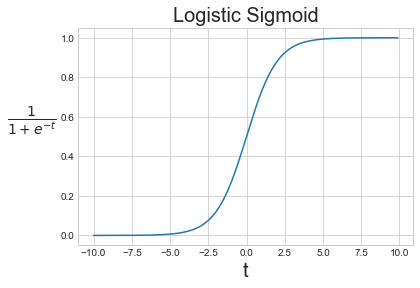

In [39]:
# We will be using the Numpy and Matplotlib libraries.
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

def logistic_sigmoid(t):
    return (1/(1+np.exp(-t)))

t = np.arange(-10, 10, 0.1)
ax = plt.axes()
ax.plot(t, logistic_sigmoid(t))
plt.title('Logistic Sigmoid', fontsize=20)
plt.xlabel('t', fontsize=20)
plt.ylabel(r'$\frac{1}{1+e^{-t}}$', rotation='horizontal', horizontalalignment='right', fontsize=20)
plt.show()

Given the explanatory variables $x_1 :=$ cholesterol and $x_2 :=$ systolic blood pressure, our *ansatz* begins by modeling the probability of a person getting a heart attack with the equation

$p(x_1, x_2) := \displaystyle\frac{1}{1+e^{-(\beta_0 + \beta_1x_1 + \beta_2x_2)}}$

for some parameters $\beta_0, \beta_1, $ and $\beta_2$. 

I say ansatz because there is no precise reason we chose to model heart disease physics with the logistic sigmoid function. There are many functions that can be used to map to the interval $[0, 1]$. For example, $x \mapsto \frac{1}{2} + \frac{1}{\pi}$arctan$(x)$ is another such function. In fact, $x \mapsto \frac{1}{2} + \frac{1}{\pi}$arctan$(x)$ slopes to 0 and 1 a lot less severely than the logistic sigmoid. There is also no particular reason we chose the input to the logistic sigmoid to have an affine response in the explanatory variables.

The underlying assumption here is that the probability of heart disease scales monotonically with cholesterol and systolic blood pressure. We are assuming also that these factors are somewhat independent. We could have chosen the true model of heart attack physics in a way that cholesterol and systolic blood pressure together provide a good indication of heart disease, but each individually does not.

As with any machine learning algorithm, it is important to consider these caveats and to rememember that our model is one among many, possibly better, alternatives. For now, we are accepting it as the truth.

With that noted, we are ready to proceed with generating our data according to this modeling assumption.

### Data Generation

Our response variables will not be probabilities, but variables indicating whether or note a person does in fact have a heart attack based on her cholesterol and systolic blood pressure.

For our example, we will fix $\beta_0, \beta_1,$ and $\beta_2$ and actually use the logistic sigmoid to generate the probabilities of each person having a heart attack. We will then roll a die with values distributed uniformly between 0 and 1 to generate the **response variables** $y(i)$ indicating whether or not each person $i$, based on their probabilities, did in fact end up having a heart attack. 

We will then use the `scikit-learn` and `statsmodels` logistic regression functions and our own implementation of **gradient descent** to recover the $\beta_0, \beta_1,$ and $\beta_2$ used to generate the data.

Here is the code to do so.

In [40]:
import numpy as np

# Generate the feature matrix drawing from the
# standard normal distribution
num_people = 100000
num_features = 2
X = np.random.normal(size = (num_people, num_features))

# Define the true model of heart attacks as follows: 
# the true probability of a given person having a
# heart attack is the logistic sigmoid function
# evaluated at 0.2 + -2.7*x1 + 2.5*x2, i.e.
# p(x1, x2) = 1/e^-(0.2 + -2.7*x1 + 2.5*x2)
actual_beta0 = 0.2 
actual_beta = np.array([[-2.7], [2.5]])
probabilities = logistic_sigmoid(np.matmul(X, actual_beta) + actual_beta0)
y = np.zeros((X.shape[0], 1)) # The vector of response variables

# We roll a die with value distributed uniformly
# between [0, 1] to see whether or not each person,
# based on their probabilites, does in fact
# get a heart attack.
# For example, if a person's probability of getting
# a heart attack is 0.2, and the die roll gives 0.15,
# the person does actually have a heart attack.
# This is equivalent to flipping a coin where
# the heads probability is given by p(x1, x2)
# and the tails probability is 1 - p(x1, x2).
for i in range(0, num_people):
    if probabilities[i] > np.random.uniform(0, 1):
        y[i] = 1

At this point, we've created synthetic people with synthetic feature values and whether or not these people had a heart attack according the the probabilistic model described above. 

In our new role as data scientist, we will try to recover the parameters $\beta_0, \beta_1, $ and $\beta_2$ used to generate the data using logistic regression.

## `Scikit-learn`

We first try `scikit-learn`'s logistic regression function to estimate the parameter values of beta for the data we created.

In [41]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression(C=1e20)

In [42]:
logistic.fit(X, np.ravel(y))

LogisticRegression(C=1e+20, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Let's see how we did.

In [43]:
predict_beta = logistic.coef_
predict_beta

array([[-2.72991716,  2.52286685]])

In [44]:
predict_beta0 = logistic.intercept_[0]
predict_beta0

0.2016769815158669

`Scikit-learn`'s logistic regression function almost perfectly recovered the values of $\beta_0 = 0.2, \beta_1 = -2.7,$ and $\beta_2 = 2.5$ that we used to generate our synthetic data.

## `Statsmodels`

Now we use the `statsmodels` Python library.

In [45]:
import statsmodels.formula.api as sm 

ones = np.ones((X.shape[0], 1))
Xaug = np.concatenate([X, ones], axis=1)
model = sm.Logit(y, Xaug)
result = model.fit(method='cg', gtol=1e-5)
result.summary()

Optimization terminated successfully.
         Current function value: 0.307996
         Iterations: 7
         Function evaluations: 23
         Gradient evaluations: 23


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99997
Method:                           MLE   Df Model:                            2
Date:                Thu, 13 Sep 2018   Pseudo R-squ.:                  0.5552
Time:                        21:42:28   Log-Likelihood:                -30800.
converged:                       True   LL-Null:                       -69249.
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.7299      0.019   -143.563      0.000      -2.767      -2.693
x2             2.5229      0.018    139.987      0.000       2.488       2.558
const          0.2017      0.010     19.741      0.000       0.182       0.222
==============================================================================
"""

In [46]:
coefficients = result.params
coefficients

array([-2.72994204,  2.52288713,  0.2016852 ])

The `statsmodels` library also did a decent job of recovering our betas. In fact the statsmodel library provides confidence intervals around each coefficient as a suggestion of how good the betas are.

In [47]:
result.conf_int()

array([[-2.76721189, -2.69267219],
       [ 2.48756416,  2.5582101 ],
       [ 0.18166068,  0.22170972]])

## Maximum Likelihood Estimation

How do these logistic regression libraries recover the values of $\beta$ used to generate the data?

Essentially, we want to find the parameter values of $\beta$ that maximize the likelihood of what happened in reality, i.e. what we actually observed. In this case, we want the values of $\beta$ that maximize the likelihood of the true instances of heart attacks that actually occurred in the people in our study . This is called **maximum likelihood estimation**.

For our example, this means that given each person $i$ of the $n = 100000$ people in the study, her observed features of cholesterol and systolic blood pressure $x(i) = \big(x_1(i), x_2(i)\big)$, an indicator of heart attack or not $y(i)$, and the logistic sigmoid $p$ to model the probabilities, we want to find $\beta = (\beta_0, \beta_1, \beta_2)$ that solves

$$
\begin{aligned}
& \underset{\beta}{\text{argmax }}\, \mathbb{P}\big[Y^{(1)} = y(1),\, Y^{(2)} = y(2),\, \cdots, Y^{(n)} = y(n)\, \big|\, X_1^{(1)} = x_1(1) ,\, X_2^{(1)} = x_2(1), \cdots, X_1^{(n)} = x_1(n), X_2^{(n)} = x_2(n)\big]\\
= &\, \underset{\beta}{\text{argmax }}\, \prod_{i = 1}^{n}\mathbb{P}\big[Y^{(i)} = y(i)\, \big|\, X_1^{(i)} = x_1(i) ,\, X_2^{(i)} = x_2(i) \big] \quad \textrm{assuming the observations for each person are independent}\\
= &\, \underset{\beta}{\text{argmax }}\, \prod_{i = 1}^{n} p\big( x(i);\beta\big)^{y(i)} \cdot \Big[1 - p\big(x(i);\beta\big)\Big]^{1 - y(i)} \quad \textrm{where we model the outcomes as a sequence of $n$ Bernoulli trials}\\
= &\,\underset{\beta}{\text{argmax }}\, \sum_{i = 1}^{n}\log\Big[p\big(x(i);\beta\big)^{y(i)} \cdot \Big(1 - p\big(x(i);\beta\big)\Big)^{1 - y(i)}\Big] \quad \textrm{since argmax $\, f(x) =$ argmax log$\,(f(x))$} \\
= &\, \underset{\beta}{\text{argmax }}\, \sum_{i = 1}^{n} \Big[y(i)\cdot\log\big[p\big( x(i);\beta\big)\big] + (1-y(i))\cdot\log\big[1 - p\big( x(i);\beta\big)\big]\Big] \quad \textrm{since log$(ab) = $ log $(a)$ + log$(b)$ and log$(a^x) = x\cdot $log$(a)$} \\
= &\, \underset{\beta}{\text{argmin }}\, -\sum_{i = 1}^{n} \Big[y(i)\cdot\log\big[p\big( x(i);\beta\big)\big] + (1-y(i))\cdot\log\big[1 - p\big( x(i);\beta\big)\big]\Big] \quad \textrm{since argmax $\, f(x) = $ argmin $\, -f(x)$} \\
= &\, \underset{\beta}{\text{argmin }}\, \sum_{i = 1}^{n} \Big[(y(i) - 1)\cdot\log\big[1 - p\big( x(i);\beta\big)\big]\Big] - y(i)\cdot\log\big[p\big( x(i);\beta\big)\big]\Big] \quad \textrm{by simplifying and rearranging terms} \\
= &\, \underset{\beta}{\text{argmin }}\, \sum_{i = 1}^{n} \Bigg[(y(i) - 1)\cdot\log\Big[1 - \frac{1}{1+e^{-x(i)\cdot\beta}}\Big] - y(i)\cdot\log\Big[\frac{1}{1+e^{-x(i)\cdot\beta}}\Big]\Bigg] \quad \textrm{substituting $p\big(x(i);\beta\big) := \displaystyle\frac{1}{1+e^{-(\beta_0 + \beta_1x_1 + \beta_2x_2)}}$}\\
= &\, \underset{\beta}{\text{argmin }}\, \frac{1}{n}\sum_{i = 1}^{n} \Big((y(i) - 1)\cdot\log\big[1 - g(x(i)\cdot\beta)\big] - y(i)\cdot\log\big[g(x(i)\cdot\beta)\big]\Big) \quad \textrm{substituting $g(t) := \displaystyle\frac{1}{1+e^{-t}}$}\\
= &\, \underset{\beta}{\text{argmin }}\, l(\beta)
\end{aligned}
$$

The objective in the second to last equality is also termed as the **loss**, which we denoted by $l(\beta)$, and we can view the problem analogously as minimizing the loss.

We will now recover the betas using our own implementation of gradient descent.

## Gradient Descent

The gradient vector at a location tells us in which direction to go to increase a function fastest. Since we want the direction of fastest decrease, we actually compute the negative gradient of the function at each location. 

![Gradient Descent Illustration](./350px-Gradient_descent.svg.png)

Starting at some initial location, say the origin, we update the parameters, i.e. weights, we are solving for by iteratively subtracting the gradient multiplied by a **learning rate** from the current weight vector until we reach the optimal solution:

$$
\beta := \beta - \eta\nabla_{\beta}l(\beta).
$$

We will derive $\nabla_{\beta}l(\beta)$ for logistic regression.

First we take the derivative of the logistic sigmoid $\displaystyle g(t) = \frac{1}{1 + e^{-t}}$, to get
$$
\begin{aligned}
g'(t) & = \frac{d}{dt}\frac{1}{1 + e^{-t}}\\
& = \frac{1}{(1 + e^{-t})^2}(e^{-t})\\
& = \frac{1}{1 + e^{-t}}\cdot\left(1 - \frac{1}{(1 + e^{-t})}\right)\\
& = g(t)(1 - g(t)).\\
\end{aligned}
$$

We use the derivative of the logistic sigmoid to compute the partial derivatives in the direction of $\beta_j$, for each $j \geq 1$, of the loss function $l$:

$$
\begin{aligned}
\frac{\partial}{\partial\beta_j}l(\beta) = & \frac{1}{n}\sum_{i = 1}^{n}\left((1 - y(i))\frac{1}{1 - g(x(i)\cdot\beta)} - y(i)\frac{1}{g(x(i)\cdot\beta)}\right)\frac{\partial}{\partial\beta_j}g(x(i)\cdot\beta)\\
= & \frac{1}{n}\sum_{i = 1}^{n}\left((1 - y(i))\frac{1}{1 - g(x(i)\cdot\beta)} - y(i)\frac{1}{g(x(i)\cdot\beta)}\right)g(x(i)\cdot\beta)\left(1 - g(x(i)\cdot\beta)\right)\frac{\partial}{\partial\beta_j}(x(i)\cdot\beta)\\
= & \frac{1}{n}\sum_{i = 1}^{n}\Big((1 - y(i))g\big(x(i)\cdot\beta\big) - y(i)\big(1 - g(x(i)\cdot\beta)\big)\Big)x_j(i)\\
= &\frac{1}{n}\sum_{i = 1}^{n}\Big(g\big(x(i)\cdot\beta\big) - y(i)\Big)x_j(i)\\
\end{aligned}
$$

and for $j = 0$,

$$
\frac{\partial}{\partial\beta_0}l(\beta) = \frac{1}{n}\sum_{i = 1}^{n}g(x(i)\cdot\beta) - y(i)\\
$$

Adding a column of ones to the feature matrix $X$ corresponding to the $\beta_0$ parameter, we can more compactly write

$\nabla_{\beta}l(\beta$) = 
$\begin{bmatrix} 
\displaystyle{\frac{\partial}{\partial \beta_0}} l(\beta)\\
\displaystyle{\frac{\partial}{\partial \beta_1}} l(\beta)\\
\displaystyle{\frac{\partial}{\partial \beta_2}} l(\beta)\\
\end{bmatrix}\\
= \displaystyle\frac{1}{n}
\begin{bmatrix}
    \sum\limits_{i=1}^n \big(g(x(i)\cdot\beta) - y(i)\big)\\
    \sum\limits_{i=1}^n \big(g(x(i)\cdot\beta) - y(i)\big) \cdot x_1(i)\\
    \sum\limits_{i=1}^n \big(g(x(i)\cdot\beta) - y(i)\big) \cdot x_2(i) \\
\end{bmatrix}\\
= \displaystyle\frac{1}{n}
\begin{bmatrix}
    1 & 1 & 1 & \dots & 1\\
    x_{1}(1)  & x_{1}(2) & x_{1}(3) & \dots & x_{1}(n) \\
    x_{2}(1)  & x_{2}(2) & x_{2}(3) & \dots & x_{2}(n) \\
\end{bmatrix}
\begin{bmatrix}
g(x(1)\cdot\beta) - y(1)\\
g(x(2)\cdot\beta) - y(2)\\
\vdots\\
g(x(n)\cdot\beta) - y(n)
\end{bmatrix}\\
= \displaystyle\frac{1}{n}
\begin{bmatrix}
    1 & 1 & 1 & \dots & 1\\
    x_{1}(1)  & x_{1}(2) & x_{1}(3) & \dots & x_{1}(n) \\
    x_{2}(1)  & x_{2}(2) & x_{2}(3) & \dots & x_{2}(n) \\
\end{bmatrix}
\left (
g\Bigg(\begin{bmatrix} 
    1 & x_{1}(1)  & x_{2}(1)\\
    1 & x_{1}(2)  & x_{2}(2)\\ \\
    \vdots & \vdots & \vdots \\
    1 & x_{1}(n)  & x_{2}(n)\\
\end{bmatrix} 
\begin{bmatrix} 
\beta_0\\
\beta_1\\
\beta_2\\
\end{bmatrix}
\Bigg)
-
\begin{bmatrix}
y(1)\\
\vdots\\
y(n)
\end{bmatrix}
\right )\\
= \displaystyle\frac{1}{n}\mathbf{X}^T(g(\mathbf{X} \cdot \beta) - \mathbf{y})
$

Having derived the gradient of the loss function, we can now implement gradient descent.

### Implementation

We code up the gradient descent algorithm discussed above. Note that we will repeat some code from above for the sake of self-containment.

In [48]:
num_iters = 10000
# Finding the right learning rate is a sophisticated problem.
# For now, we fix it at 0.1.
lr = 0.1 

# Add a column of ones to the feature matrix X.
def add_intercept(X):
    ones = np.ones((X.shape[0], 1))
    return np.concatenate([ones, X], axis=1)

# Define the logistic siqmoid.
def logistic_sigmoid(t):
    return 1/(1 + np.exp(-t))

# Define the objective term derived in the maximum likelihood estimation.
def loss(h, y):
    return np.dot((y - 1).T, np.log(1 - h)) - np.dot(y.T, np.log(h))

def fit(X, y):   
    # Add the column of ones corresponding to beta0 to X.
    X = add_intercept(X)
    
    # Initialize beta
    beta = np.zeros((X.shape[1], 1))
    
    for i in range(num_iters):
        # Compute X*beta.
        z = np.dot(X, beta)
        # Evaluate the logistic sigmoid at X*beta.
        h = logistic_sigmoid(z)
        # Scale the gradient with sample size for better convergence performance.
        gradient = np.dot(X.T, h - y)/y.size
        beta = beta - lr*gradient
    
    z = np.dot(X, beta)
    h = logistic_sigmoid(z)
    obj_val = loss(h, y)
    return beta, obj_val[0][0]

gd_beta, gd_obj_val = fit(X, y)
print("gradient descent betas: {} {} {}".format(round(gd_beta[0][0], 4), round(gd_beta[1][0], 4), round(gd_beta[2][0], 4)))
print("gradient descent objective value: {}".format(round(gd_obj_val, 1)))

gradient descent betas: 0.2017 -2.7299 2.5229
gradient descent objective value: 30799.6


Our own implementation of gradient descent did a decent job of recovering the betas as well. Notice that the final objective value matches closely with the objective determined by the `statsmodels` library.

## Check the Objective Value

Let's do a primitive check that what we found is in fact a minimum.

In [49]:
print("Minimum value of objective: {}".format(gd_obj_val))

# Slightly perturb beta by a vector epsilon.
epsilon = np.array([[0.01], [0], [0]])

# Perturbing beta0 to a slightly smaller or bigger value
# should cause the objective function to increase
# above the minimum value.

left_beta = gd_beta - epsilon
z = np.dot(add_intercept(X), left_beta)
h = logistic_sigmoid(z)
print("Objective value when beta0 is shifted a little to the left: {}".format(loss(h, y)[0][0]))

right_beta = gd_beta + epsilon
z = np.dot(add_intercept(X), right_beta)
h = logistic_sigmoid(z)
print("Objective value when beta0 is shifted a little to the right: {}".format(loss(h, y)[0][0]))

Minimum value of objective: 30799.639831902845
Objective value when beta0 is shifted a little to the left: 30800.124592463988
Objective value when beta0 is shifted a little to the right: 30800.124560715565


## Summary

We assumed two different roles in this thought experiment.

1. As fake data creator, we took as our ansatz the following model of heart attack physics:
    * The probability of getting a heart attack is $p(x_1, x_2) := \displaystyle\frac{1}{1+e^{-(0.2 + -2.7x_1 + 2.5x_2)}}$, where $x_1$ is cholesterol and $x_2$ is systolic blood pressure.
    * Flip a coin with probability of heads equal to $p(x_1, x_2)$ and probability of tails equal to $1 - p(x_1, x_2)$ to determine if the person does in fact have a heart attack based on said probabiity.
2. As a data scientist who was handed the feature values and binary indicators of heart attack or not, we reconstructed approximations to the betas used to generate the fake data in step 1 by
    * Using the `scikit-learn` and `statsmodels` logistic regression libraries.
    * Formulating the problem as a maximum likelihood estimate to derive our own implementation of gradient descent.
    * Performing a quick sanity check to make sure that our implementation of gradient descent found a minimum by plugging in slight deviations of the reconstructed betas into the objective of the maximum likelihood estimate.

## References

https://en.wikipedia.org/wiki/Logistic_regression

http://cs229.stanford.edu/notes/cs229-notes1.pdf

https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac

https://mashimo.wordpress.com/2017/07/26/logistic-regression-with-python-statsmodels/

http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html

http://neuralnetworksanddeeplearning.com/chap3.html

## Exercises

1. Play around with the `num_people`, `num_iters`, and `lr` parameters in the code snippets above. Observe the resulting convergence times and the quality of recovered betas. 
2. Work through the digits classification exercise provided by scikit-learn located here:
http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#clf-tut
3. Read about **regularized logistic regression**.